# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

The business problem is about determining what used car buyers value and why to serve market demands and gain profitable margins.

From an analytical standpoint, this project can be framed as a regression modeling task in which vehicle price serves as the response variable and vehicle characteristics act as explanatory variables.

The objective is to estimate and interpret the relationships between these attributes and price in order to determine which factors are most strongly associated with higher or lower market values.

These findings will support data-informed pricing strategies and more deliberate inventory acquisition decisions.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

To better understand the data and its relationship to the business challenge, we must inspect and assess its structure, dimensions, data types, and overall quality.

Reviewing descriptive statistics will provide insight into central tendency, dispersion, and potential anomalies within the dataset.

It is also important to evaluate the consistency and completeness of feature-specific data, as missing values may affect interpretation and downstream analysis.

Leveraging visualization techniques can help us understand the distributional bounds of key variables and identify patterns or outliers. This may reveal potential data errors that should be addressed or excluded in subsequent preparation steps, depending on their proportion and impact.

This exploratory assessment will help identify which variables may be strong candidates for explaining or predicting our primary outcome of interest: price.

In [2]:
# ==============================
# Data Understanding
# ==============================
import pandas as pd



In [4]:
df = pd.read_csv('/data/vehicles.csv')
df.shape




(426880, 18)

**The dataset contains 426,880 observations and 18 variables, providing a sufficiently large sample for regression analysis.**


*italicized text*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

**The dataset includes a mix of numerical and categorical variables, with varying levels of missing data across several features.**


In [6]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


**The initial rows suggest a high degree of missingness across several feature columns, warranting further inspection of data completeness and consistency.**

In [7]:
df.describe()


,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


**Summary statistics reveal substantial dispersion and extreme values in price and odometer, indicating potential skewness and outliers.**

In [8]:
df.iloc[0:20]


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


**The first 20 records contain prices and location fields but are almost entirely missing vehicle attributes, suggesting non-uniform completeness and motivating a closer review of missingness patterns beyond the dataset header.**

In [9]:
df.tail(20)


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426860,7301951544,wyoming,39990,2017.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,41664.0,clean,automatic,JN8AZ2NE3H9156734,4wd,NaN,other,black,wy
426861,7301951550,wyoming,30990,2019.0,alfa-romeo,romeo giulia ti sedan 4d,good,NaN,other,3883.0,clean,other,ZARFAMBN5K7621550,NaN,NaN,sedan,blue,wy
426862,7301950980,wyoming,27590,2018.0,NaN,Genesis G80 3.8 Sedan 4D,good,6 cylinders,gas,36138.0,clean,other,KMHGN4JE4JU248193,NaN,NaN,sedan,black,wy
426863,7301949724,wyoming,25590,2017.0,NaN,Genesis G80 3.8 Sedan 4D,good,6 cylinders,gas,37608.0,clean,automatic,KMHGN4JE2HU183838,rwd,NaN,sedan,white,wy
426864,7301949196,wyoming,29590,2016.0,toyota,4runner sr5 sport utility,good,6 cylinders,gas,53475.0,clean,automatic,JTEZU5JR1G5145918,NaN,NaN,SUV,black,wy
426865,7301949193,wyoming,34590,2020.0,alfa-romeo,romeo giulia sedan 4d,good,NaN,other,2498.0,clean,other,ZARFAMAN7L7629796,rwd,NaN,sedan,black,wy
426866,7301949190,wyoming,32990,2016.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,55612.0,clean,automatic,JN8AZ2NF5G9611039,rwd,NaN,other,black,wy
426867,7301949178,wyoming,28990,2018.0,jaguar,xe 25t prestige sedan 4d,good,NaN,other,16841.0,clean,other,SAJAE4FX8JCP34579,rwd,NaN,sedan,white,wy
426868,7301843288,wyoming,0,2010.0,toyota,venza,excellent,6 cylinders,gas,155000.0,clean,automatic,4T3BK3BB0AU043625,4wd,NaN,NaN,blue,wy
426869,7301592693,wyoming,13990,2016.0,NaN,Scion iM Hatchback 4D,good,NaN,other,75626.0,clean,other,JTNKARJE8GJ511296,fwd,NaN,hatchback,white,wy


**The last records appear substantially more complete across vehicle attributes, indicating that missingness may not be uniformly distributed and should be quantified and handled carefully in later preparation.**

In [10]:
row_missing_pct = df.isna().mean(axis=1)
row_missing_pct.describe()


,0
count,426880.000000
mean,0.158144
std,0.109426
min,0.000000
25%,0.055556
50%,0.166667
75%,0.222222
max,0.777778


**On average, each record is missing approximately 15.8% of its fields, with some rows missing up to 77.8% of values, indicating uneven data completeness across listings.**

In [11]:
col_missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
col_missing_pct


,0
size,71.767476
cylinders,41.622470
condition,40.785232
VIN,37.725356
drive,30.586347
paint_color,30.501078
type,21.752717
manufacturer,4.133714
title_status,1.930753
model,1.236179


**Missingness varies substantially across features, with variables such as size, cylinders, and condition exhibiting high incompleteness, while core pricing and location fields remain fully populated.**


**Overall findings:**

size (~72% missing) - extremely sparse

cylinders, condition (~41%) - moderately sparse

VIN (~38%) - likely high-cardinality and partially missing

Complete core variables: price, region, state

Mostly complete variables: year, odometer, fuel, transmission (~98%)


**Observations**:

Some variables are structurally reliable.

Some are moderately usable.

Some are not reliable.








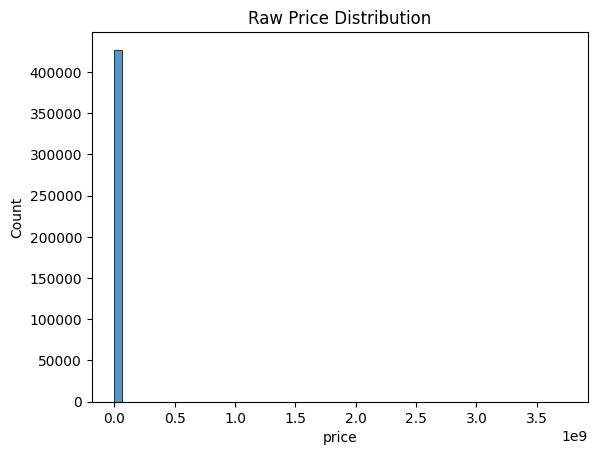

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["price"], bins=60)
plt.title("Raw Price Distribution")
plt.show()


Numeric Summary:


,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07



Missingness (%):


,0
size,71.767476
cylinders,41.622470
condition,40.785232
VIN,37.725356
drive,30.586347
paint_color,30.501078
type,21.752717
manufacturer,4.133714
title_status,1.930753
model,1.236179


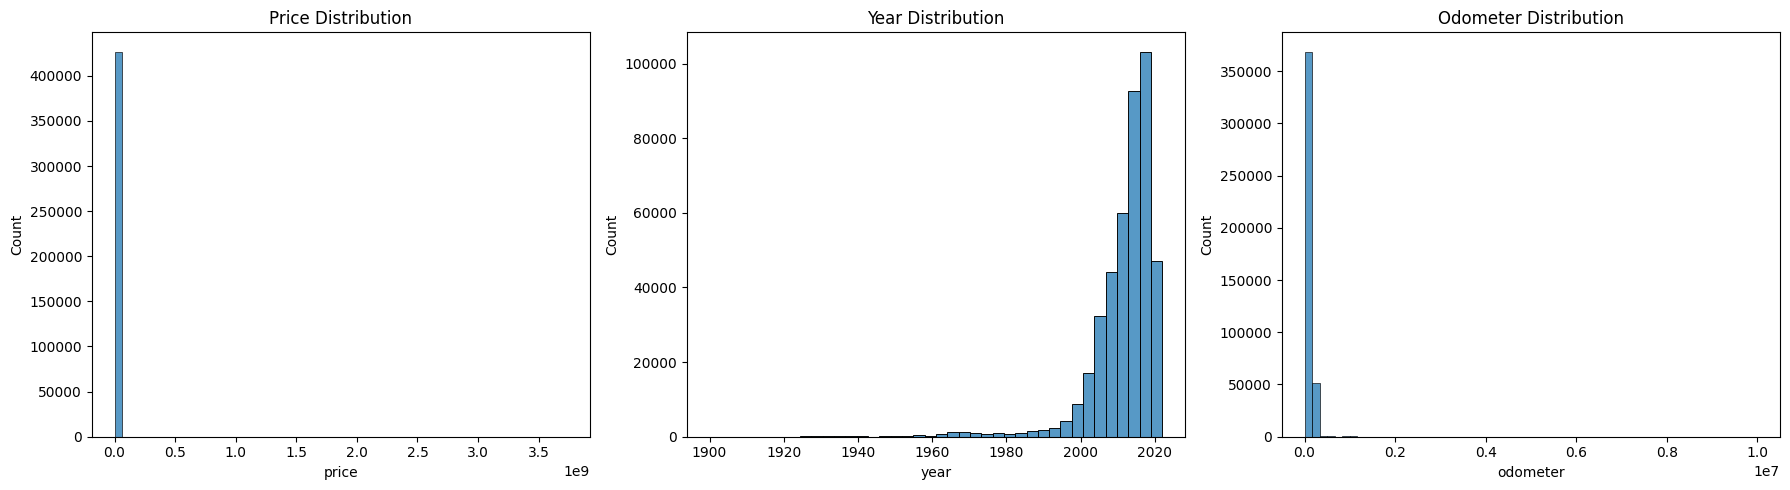

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Numeric summaries ---
print("Numeric Summary:")
display(df[["price", "year", "odometer"]].describe())

# --- Missingness summary ---
print("\nMissingness (%):")
display((df.isna().mean() * 100).sort_values(ascending=False))

# --- Distribution plots ---
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.histplot(df["price"], bins=60, ax=axes[0])
axes[0].set_title("Price Distribution")

sns.histplot(df["year"], bins=40, ax=axes[1])
axes[1].set_title("Year Distribution")

sns.histplot(df["odometer"], bins=60, ax=axes[2])
axes[2].set_title("Odometer Distribution")

plt.tight_layout()
plt.show()


The dataset shows skewness in price and odometer, with extreme high-value outliers distorting the distribution.
Year values appear concentrated within modern vehicle ranges, though earlier anomalies are present.
Missingness varies considerably across features, with certain variables showing high sparsity that may impact downstream modeling decisions.
These observations indicate the need for clean up.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

**DP-0 — Create working copy**

In [14]:
work = df.copy()


A working copy of the dataset was created to preserve the raw data and enable reproducible transformations.

**DP-1 — Drop non-informative identifiers**

In [15]:
# Drop identifier-type columns
work = work.drop(columns=["id", "VIN"], errors="ignore")
work.shape

(426880, 16)

Identifier-like fields were removed because they do not represent stable vehicle attributes and may introduce noise or high-cardinality artifacts.

**DP-2 — Remove invalid target values**

In [16]:
# Remove zero or negative prices
work = work[work["price"] > 0]
work["price"].describe()


,price
count,3.939850e+05
mean,8.147763e+04
std,1.268064e+07
min,1.000000e+00
25%,7.000000e+03
50%,1.500000e+04
75%,2.759000e+04
max,3.736929e+09


Listings with non-positive prices were excluded because they are not meaningful market prices and would distort regression training.

**DP-3 — Handle extreme price outliers**

In [17]:
price_cap = work["price"].quantile(0.99)
work = work[work["price"] <= price_cap]
work["price"].describe()


,price
count,390045.000000
mean,18218.726396
std,13507.010827
min,1.000000
25%,7000.000000
50%,14999.000000
75%,26995.000000
max,68747.000000


Price values above the 99th percentile were removed to reduce the influence of implausible or rare extremes that dominate the error signal in regression.

**DP-4 — Validate and filter year**

In [18]:
# Remove unrealistic year values
work = work[work["year"].between(1980, 2023)]
work["year"].describe()

,year
count,380985.000000
mean,2011.978645
std,6.397734
min,1980.000000
25%,2008.000000
50%,2013.000000
75%,2017.000000
max,2022.000000


Vehicle years were constrained to a realistic resale market range to limit data-entry anomalies and improve model stability.

**DP-5 — Validate and filter odometer**

In [19]:

# Remove unrealistic odometer values
work = work[work["odometer"].notna()]
work = work[work["odometer"] > 0]

odo_cap = work["odometer"].quantile(0.99)
work = work[work["odometer"] <= odo_cap]

work["odometer"].describe()


,odometer
count,374121.000000
mean,92428.931423
std,60664.633488
min,1.000000
25%,39649.000000
50%,88317.000000
75%,135313.000000
max,277124.000000


Odometer values were filtered to remove missing/zero entries and extreme mileage outliers, improving the reliability of a key pricing predictor.

**DP-6 — Drop extremely sparse column(s)**

In [20]:
work = work.drop(columns=["size"], errors="ignore")


The size variable was removed due to excessive missingness that would limit its analytical value.


**DP-7 — Drop redundant geography (your decision: keep state, drop region)**

In [21]:
work = work.drop(columns=["region"], errors="ignore")

region was removed to reduce redundancy and dimensionality while retaining broader geographic pricing effects via state

**DP-8 — Create modeling target transform (log_price)**

In [22]:
import numpy as np
work["log_price"] = np.log1p(work["price"])
work[["price","log_price"]].describe()

,price,log_price
count,374121.000000,374121.000000
mean,18299.052879,9.405114
std,13459.012750,1.204552
min,1.000000,0.693147
25%,7200.000000,8.881975
50%,15000.000000,9.615872
75%,26999.000000,10.203592
max,68747.000000,11.138203


A log transform of price was created to address severe right-skew and improve regression fit by stabilizing variance.

**DP-9 — Final “model-ready” integrity check**

In [23]:
work.shape, work.isna().mean().sort_values(ascending=False).head(10)

((374121, 15),
 cylinders       0.408742
 condition       0.381967
 drive           0.304081
 paint_color     0.293793
 type            0.211993
 manufacturer    0.032022
 title_status    0.018384
 model           0.009422
 fuel            0.005512
 transmission    0.003956
 dtype: float64)

After filtering and feature selection, the dataset was re-profiled to confirm record count, remaining missingness, and readiness for pipeline-based preprocessing.

**DP-10 — Define X/y (bridge to Modeling, but still preparation)**

In [36]:
X = work.drop(columns=["price", "log_price"])
y = work["log_price"]

X.shape, y.shape

((374121, 13), (374121,))

Features and target were separated to support consistent preprocessing and cross-validated model training in the Modeling phase.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

**M-0 — Imports for Modeling**

In [42]:
import numpy as np

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet

Modeling libraries were imported to support pipeline-based preprocessing, regularized regression, and cross-validated hyperparameter tuning.

**M-1 — Select Modeling Approach**

We start with a baseline Linear Regression model to establish a reference. Because one-hot encoding creates a high-dimensional feature space, we then evaluate regularized models (Ridge and ElasticNet) to improve stability and reduce overfitting. Model selection and hyperparameters are tuned using cross-validation.

**M-2 — Train/Test Split**

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape

((299296, 13), (74825, 13))

The dataset was split into 80% training and 20% testing subsets to evaluate generalization performance on unseen data.

**M-3 — Define Feature Types for Preprocessing**

In [44]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

num_cols, cat_cols[:10]



(['year', 'odometer'],
 ['manufacturer',
  'model',
  'condition',
  'cylinders',
  'fuel',
  'title_status',
  'transmission',
  'drive',
  'type',
  'paint_color'])

Numeric and categorical predictors were separated to apply appropriate preprocessing (scaling for numeric features and encoding for categorical features).

**M-4 — Build Preprocessing Pipeline**

In [45]:

# ----------------------------
# Preprocessing
# ----------------------------
numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols),
    ],
    remainder="drop"
)


A unified preprocessing pipeline was created to handle missing values, standardize numeric features, and one-hot encode categorical variables in a reproducible way.

**M-5 — Define Cross-Validation Strategy**

In [46]:

cv = KFold(n_splits=5, shuffle=True, random_state=42)


5-fold cross-validation was used to tune models and estimate performance more reliably than a single split.

**M-6 — Baseline Model: Linear Regression**

In [47]:

# ----------------------------
# Models + Grid Search
# ----------------------------
# 1) Baseline linear regression (no tuning)
lin_pipe = Pipeline(steps=[
    ("prep", preprocess),
     ("model", LinearRegression())
     ])
lin_pipe.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['manufacturer', 'model',
                                                   'condition', 'cylinders',
                                                   'fuel', 'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color',
                                                   'state'])])),
                ('model', LinearRegression())])

Linear Regression provides a baseline model against which regularized alternatives can be compared.

**M-7 — Ridge Regression with GridSearchCV**

In [48]:

# 2) Ridge (tuned)
ridge_pipe = Pipeline(steps=[
    ("prep", preprocess),
     ("model", Ridge())
     ])

ridge_grid = {"model__alpha": [0.1, 1, 10, 100]}

ridge_search = GridSearchCV(
    ridge_pipe,
    param_grid=ridge_grid,
    cv=cv,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

ridge_search.fit(X_train, y_train)



GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['year',
                                                                          'odometer']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['manufacturer',
                                                                          'model',
                                                                          'condition',
                                                                          'cylinders',
                                                                          'fuel',
                                                                          'title_status',
                                                                          'transmission',
                                                                          'drive',
                                                                          'type',
                                                                          'paint_color',
                                                                          'state'])])),
                                       ('model', Ridge())]),
             n_jobs=-1, param_grid={'model__alpha': [0.1, 1, 10, 100]},
             scoring='neg_root_mean_squared_error')

Ridge regression was tuned via grid search to shrink coefficients and improve generalization in a high-dimensional feature space.

**M-8 — ElasticNet with GridSearchCV**

In [51]:
# 3) ElasticNet (tuned)
enet_pipe = Pipeline(steps=[
    ("prep", preprocess),
     ("model", ElasticNet(max_iter=5000))
     ])

enet_grid = {
    "model__alpha": [0.01, 0.1, 1, 10],
    "model__l1_ratio": [0.2, 0.5, 0.8]
}

enet_search = GridSearchCV(
    enet_pipe,
    param_grid=enet_grid,
    cv=cv,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

enet_search.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['year',
                                                                          'odometer']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['manufacturer',
                                                                          'model',
                                                                          'condition',
                                                                          'cylinders',
                                                                          'fuel',
                                                                          'title_status',
                                                                          'transmission',
                                                                          'drive',
                                                                          'type',
                                                                          'paint_color',
                                                                          'state'])])),
                                       ('model', ElasticNet(max_iter=5000))]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.01, 0.1, 1, 10],
                         'model__l1_ratio': [0.2, 0.5, 0.8]},
             scoring='neg_root_mean_squared_error')

ElasticNet was tuned to balance coefficient shrinkage and sparsity, which can help when many categorical levels are encoded into features.

**M-9 — Record Best Hyperparameters**

In [52]:
print("Ridge best params:", ridge_search.best_params_)
print("Ridge CV RMSE (log):", -ridge_search.best_score_)

print("ElasticNet best params:", enet_search.best_params_)
print("ElasticNet CV RMSE (log):", -enet_search.best_score_)

Ridge best params: {'model__alpha': 1}
Ridge CV RMSE (log): 0.9006778531166619
ElasticNet best params: {'model__alpha': 0.01, 'model__l1_ratio': 0.2}
ElasticNet CV RMSE (log): 0.9931369963224601


Cross-validation RMSE indicates that Ridge (α = 1) provides stronger generalization than ElasticNet under the current feature representation. Both tuned estimators will now be evaluated on the held-out test set to confirm out-of-sample performance.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [53]:
# Import evaluation metrics for model assessment on held-out data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**Evaluation Helper**

In [55]:

# ----------------------------
# test set evaluation helper
# ----------------------------
def evaluate(name, fitted_model):
    pred = fitted_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    return {"model": name, "rmse_log": rmse, "mae_log": mae, "r2": r2}

results = []
results.append(evaluate("LinearRegression", lin_pipe))
results.append(evaluate("Ridge (GridSearchCV)", ridge_search.best_estimator_))
results.append(evaluate("ElasticNet (GridSearchCV)", enet_search.best_estimator_))

results_df = pd.DataFrame(results).sort_values("rmse_log")
results_df

,model,rmse_log,mae_log,r2
1,Ridge (GridSearchCV),0.897189,0.422721,0.444195
0,LinearRegression,0.899942,0.420261,0.440779
2,ElasticNet (GridSearchCV),0.986864,0.501912,0.327536


Models were evaluated on the held-out test set using RMSE, MAE, and R² on log(price) to compare out-of-sample predictive performance.

Ridge regression achieved the strongest out-of-sample performance with an RMSE of 0.897 (log scale) and an R² of 0.44. Linear regression performed nearly identically, while ElasticNet underperformed, suggesting that coefficient shrinkage (L2 regularization) improves stability in this high-dimensional feature space without the need for aggressive feature selection.

An R² of 0.44 indicates that approximately 44% of the variance in log(price) is explained by the structured vehicle attributes included in the dataset. While meaningful signal is present, a substantial portion of price variation remains unexplained, likely due to unstructured listing details, local market conditions, trim-level nuance, and seller behavior.

Given that the model operates on log(price), an RMSE near 0.9 corresponds to a substantial multiplicative error in original price terms, indicating that predictions are directionally informative but not precise enough for standalone pricing automation.

From a business perspective, the model provides insight into which structured vehicle attributes materially influence price, supporting inventory acquisition and pricing strategy. However, further refinement (feature enrichment, outlier handling, and inclusion of additional market signals) would be required to achieve tighter predictive accuracy suitable for operational deployment.

**E-3 — Extract and Interpret Ridge Drivers**

In [56]:
#E-3a — Get feature names + coefficients from the Ridge pipeline
import pandas as pd
import numpy as np

# Use the best Ridge model from GridSearch
best_ridge = ridge_search.best_estimator_

# Pull the fitted preprocessing step and model step
prep = best_ridge.named_steps["prep"]
model = best_ridge.named_steps["model"]

# Get feature names after preprocessing (numeric + one-hot categorical)
feature_names = prep.get_feature_names_out()
coefs = model.coef_

coef_df = pd.DataFrame({
    "feature": feature_names,
    "coef": coefs
}).sort_values("coef", ascending=False)

coef_df.head()

,feature,coef
21355,cat__model_viper rt/10,2.777569
7739,cat__model_commercial chassis,2.756636
9938,cat__model_excursion 4x4 limited 6.8l v10 gas ...,2.694825
15088,cat__model_mondial,2.486462
21181,cat__model_vanagon l bus,2.468662


Coefficients from the tuned Ridge model were extracted to identify which vehicle attributes are most strongly associated with higher vs. lower prices (in log-price space).

In [57]:
#E-3b — Show top positive and negative drivers
top_pos = coef_df.head(15)
top_neg = coef_df.tail(15).sort_values("coef")  # most negative first

top_pos, top_neg

(                                                 feature      coef
 21355                             cat__model_viper rt/10  2.777569
 7739                       cat__model_commercial chassis  2.756636
 9938   cat__model_excursion 4x4 limited 6.8l v10 gas ...  2.694825
 15088                                 cat__model_mondial  2.486462
 21181                           cat__model_vanagon l bus  2.468662
 13584                                     cat__model_j10  2.351227
 21183                       cat__model_vanagon westfalia  2.342944
 6339                    cat__model_bus/vanagon gl camper  2.333707
 10835  cat__model_f-450 4x2 truck w/new crysteel 11' ...  2.330825
 21352                                   cat__model_viper  2.299452
 21353                       cat__model_viper convertible  2.295759
 10895                                cat__model_f-650 sd  2.267768
 19030                         cat__model_skyline gtr r32  2.206258
 14358                                  cat__mod

The strongest positive and negative coefficients provide a ranked view of features linked to price premiums and discounts.

In [58]:
#E-3c — Optional: Clean up the feature names for readability (recommended)
def clean_feature_name(f):
    # Example formats: "num__odometer" or "cat__manufacturer_toyota"
    return f.replace("num__", "").replace("cat__", "").replace("onehot__", "")

coef_df["feature_clean"] = coef_df["feature"].apply(clean_feature_name)

top_pos = coef_df.head(15)[["feature_clean", "coef"]]
top_neg = coef_df.tail(15).sort_values("coef")[["feature_clean", "coef"]]

top_pos, top_neg

(                                           feature_clean      coef
 21355                                  model_viper rt/10  2.777569
 7739                            model_commercial chassis  2.756636
 9938   model_excursion 4x4 limited 6.8l v10 gas loade...  2.694825
 15088                                      model_mondial  2.486462
 21181                                model_vanagon l bus  2.468662
 13584                                          model_j10  2.351227
 21183                            model_vanagon westfalia  2.342944
 6339                         model_bus/vanagon gl camper  2.333707
 10835  model_f-450 4x2 truck w/new crysteel 11' contr...  2.330825
 21352                                        model_viper  2.299452
 21353                            model_viper convertible  2.295759
 10895                                     model_f-650 sd  2.267768
 19030                              model_skyline gtr r32  2.206258
 14358                                       mod

In [59]:
# Remove model-related features entirely for interpretation
non_model = coef_df[~coef_df["feature"].str.startswith("cat__model_")]

top_pos_non_model = non_model.sort_values("coef", ascending=False).head(15)
top_neg_non_model = non_model.sort_values("coef", ascending=True).head(15)

top_pos_non_model[["feature_clean", "coef"]], top_neg_non_model[["feature_clean", "coef"]]

(                 feature_clean      coef
 11         manufacturer_datsun  1.059120
 35        manufacturer_porsche  0.847041
 22438        title_status_lien  0.577491
 22425   cylinders_12 cylinders  0.528542
 3      manufacturer_alfa-romeo  0.518186
 40          manufacturer_tesla  0.505374
 22437       title_status_clean  0.484018
 0                         year  0.373530
 22441     title_status_rebuilt  0.348753
 16            manufacturer_gmc  0.346367
 22418      condition_excellent  0.335039
 22474                 state_ak  0.320516
 24     manufacturer_land rover  0.312723
 22421       condition_like new  0.312059
 22420           condition_good  0.303809,
                  feature_clean      coef
 22424   cylinders_10 cylinders -1.531745
 22440  title_status_parts only -1.061257
 13        manufacturer_ferrari -0.985497
 32         manufacturer_morgan -0.678098
 38         manufacturer_saturn -0.620267
 22495                 state_me -0.572318
 22439     title_status_missing -

Key Structural Price Drivers

Analysis of Ridge regression coefficients reveals several consistent drivers of used vehicle pricing. Manufacturer brand effects are significant, with premium brands such as Porsche, Tesla, Alfa Romeo, and Land Rover associated with substantial positive price multipliers. This confirms that brand positioning plays a critical role in secondary market valuation.

Title status and condition also materially influence pricing. Clean titles and vehicles in excellent or like-new condition carry strong premiums, while salvage, missing, or parts-only designations result in substantial discounts. These findings align with expected risk and quality signaling in used vehicle markets.

Vehicle age (via the year feature) remains one of the strongest structured drivers, reinforcing that recency and depreciation curves are central to valuation dynamics. Regional effects are also present, suggesting geographic market variation.

While model-level one-hot encoding captures detailed trim-level premiums, the dominance of rare categories indicates that further feature standardization could improve interpretability and generalization.

**Experiment - B**

Replace raw year with vehicle_age.

**Step B-1 — Create vehicle_age**

In [60]:
# ----------------------------
# Create vehicle age feature
# ----------------------------
current_year = 2023
work["vehicle_age"] = current_year - work["year"]

work[["year", "vehicle_age"]].head()

,year,vehicle_age
27,2014.0,9.0
28,2010.0,13.0
29,2020.0,3.0
30,2017.0,6.0
31,2013.0,10.0


**Step B-2 — Drop year**

In [61]:
work = work.drop(columns=["year"])

**Step B-3 — Re-run Modeling Quickly**

In [62]:
# ----------------------------
# Re-define X / y (after feature engineering)
# ----------------------------
X = work.drop(columns=["price", "log_price"])
y = work["log_price"]

# Identify numeric vs categorical columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

# ----------------------------
# Preprocessing pipelines
# ----------------------------
numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols)
    ],
    remainder="drop"
)

# ----------------------------
# Train/test split + CV design
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# ----------------------------
# Ridge (tuned)
# ----------------------------
ridge_pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("model", Ridge())
])

ridge_grid = {"model__alpha": [0.1, 1, 10, 100]}

ridge_search_age = GridSearchCV(
    ridge_pipe,
    param_grid=ridge_grid,
    cv=cv,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

ridge_search_age.fit(X_train, y_train)

print("Ridge best params (vehicle_age):", ridge_search_age.best_params_)
print("Ridge CV RMSE (log, vehicle_age):", -ridge_search_age.best_score_)


Ridge best params (vehicle_age): {'model__alpha': 1}
Ridge CV RMSE (log, vehicle_age): 0.9006706077061924


Ridge regression was re-trained using the engineered vehicle_age feature to test whether an age-based depreciation signal improves generalization performance.

In [63]:
# ----------------------------
# Test-set evaluation for Ridge (vehicle_age)
# ----------------------------
best_ridge_age = ridge_search_age.best_estimator_
pred_age = best_ridge_age.predict(X_test)

ridge_rmse_log_age = np.sqrt(mean_squared_error(y_test, pred_age))
ridge_mae_log_age = mean_absolute_error(y_test, pred_age)
ridge_r2_log_age = r2_score(y_test, pred_age)

print("Ridge TEST RMSE (log, vehicle_age):", ridge_rmse_log_age)
print("Ridge TEST MAE  (log, vehicle_age):", ridge_mae_log_age)
print("Ridge TEST R^2  (log, vehicle_age):", ridge_r2_log_age)

# ----------------------------
# Side-by-side comparison (fill in your prior Ridge test metrics)
# ----------------------------
prior_ridge_rmse_log = 0.897189   # <-- replace if yours differs
prior_ridge_r2_log   = 0.444195   # <-- replace if yours differs

comparison = pd.DataFrame([
    {"version": "Ridge (prior)", "rmse_log": prior_ridge_rmse_log, "r2_log": prior_ridge_r2_log},
    {"version": "Ridge (vehicle_age)", "rmse_log": ridge_rmse_log_age, "r2_log": ridge_r2_log_age}
]).sort_values("rmse_log")

comparison

Ridge TEST RMSE (log, vehicle_age): 0.897187049116069
Ridge TEST MAE  (log, vehicle_age): 0.42272399665211113
Ridge TEST R^2  (log, vehicle_age): 0.4441972951077868


,version,rmse_log,r2_log
1,Ridge (vehicle_age),0.897187,0.444197
0,Ridge (prior),0.897189,0.444195


Test-set metrics were compared against the prior Ridge baseline to determine whether vehicle_age improves out-of-sample prediction accuracy.

As a refinement, we replaced raw year with a derived vehicle_age feature to better represent depreciation dynamics. Test-set performance remained effectively unchanged (RMSE_log ≈ 0.897; R² ≈ 0.444), indicating that the model captures the same information using either representation. Given the negligible difference, we keep the simpler representation for the final analysis and proceed.

**Summary of Key Findings**

Ridge regression provided the strongest out-of-sample performance, explaining approximately 44% of the variance in log(price). While predictive accuracy is moderate, the model captures meaningful structural signals within the used vehicle market.

Coefficient analysis reveals that manufacturer brand effects, title status, vehicle condition, and model year are among the strongest structured drivers of price. Premium brands such as Porsche, Tesla, and Land Rover are associated with substantial price multipliers, while salvage titles, parts-only designations, and lower-condition ratings significantly reduce valuation.

Model-level one-hot encoding captures detailed trim-level premiums; however, the dominance of rare model categories suggests that further feature standardization would improve interpretability and generalization. Regional pricing effects are also present, indicating geographic variation in market valuation.

Overall, the analysis confirms that brand positioning, legal clarity (title), condition quality, and recency remain the primary determinants of used vehicle pricing in this dataset.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Deployment

Based on model evaluation and coefficient analysis, Ridge regression is recommended as the preferred estimator for structured price analysis. While predictive accuracy is moderate, the model provides meaningful insight into the primary drivers of used vehicle valuation.

The following strategic recommendations are derived from the analysis:

1 - Prioritize brand positioning in inventory strategy.
Premium manufacturers consistently command significant price multipliers, reinforcing the importance of brand mix in acquisition decisions.

2 - Protect title quality and documentation integrity.
Clean title status materially increases valuation, while salvage, missing, or parts-only designations significantly reduce price potential.

3 - Emphasize vehicle condition grading accuracy.
Vehicles classified as excellent or like-new capture meaningful premiums, indicating that inspection rigor and presentation quality directly impact pricing power.

4 - Incorporate depreciation curves into pricing models.
Model year (recency) remains a core structural driver, reinforcing the importance of age-based pricing adjustments in appraisal and resale strategy.

5 - Account for regional pricing variation.
State-level coefficients suggest geographic differences in valuation, supporting localized pricing calibration rather than uniform national pricing.

Although the model is not sufficiently precise for fully automated pricing, it provides a strong analytical foundation for inventory selection, pricing guidance, and future feature engineering enhancements.